<a href="https://colab.research.google.com/github/thiennguyen37-qn/MyProjects/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/My Projects/Diabetes (2024 - remake)/Datasets/diabetes.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [15]:
df['diabetes'].value_counts()

,count
diabetes,
0,91482
1,8500


In [5]:
def count(df,col):
  sns.countplot(data = df, x = col)
  plt.show()

def hist(df,col,n_bins):
  sns.histplot(data = df, x = col, bins = n_bins, kde = True)
  plt.show()

def box(df,col):
  sns.boxplot(data = df, x = col)
  plt.show()

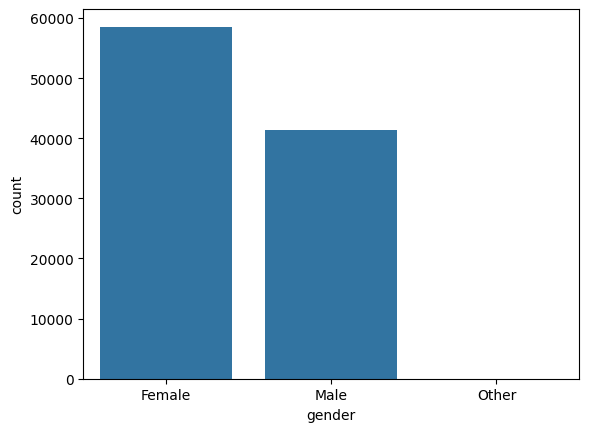

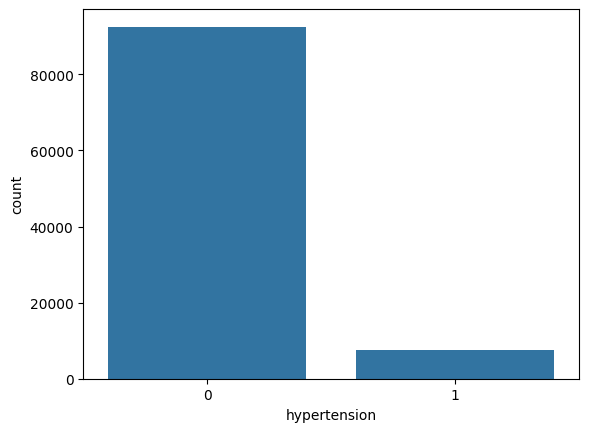

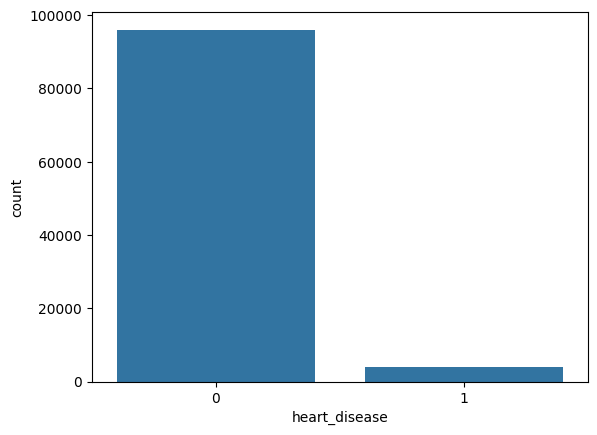

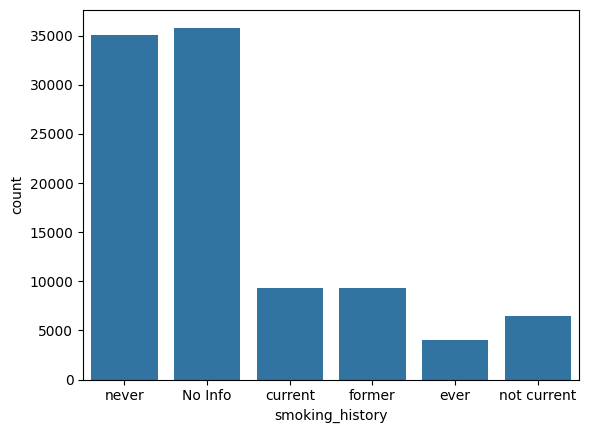

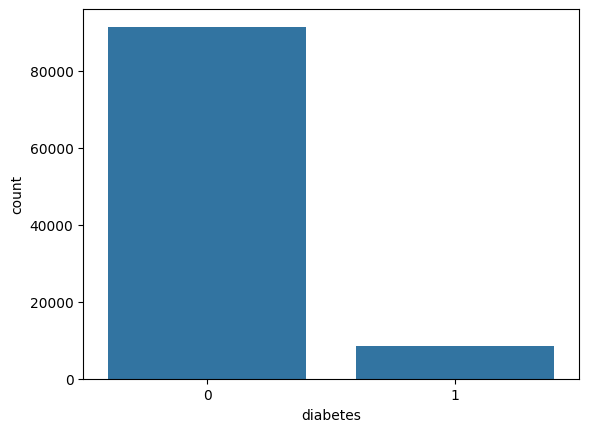

In [6]:
count(df,'gender')
count(df,'hypertension')
count(df,'heart_disease')
count(df,'smoking_history')
count(df,'diabetes')

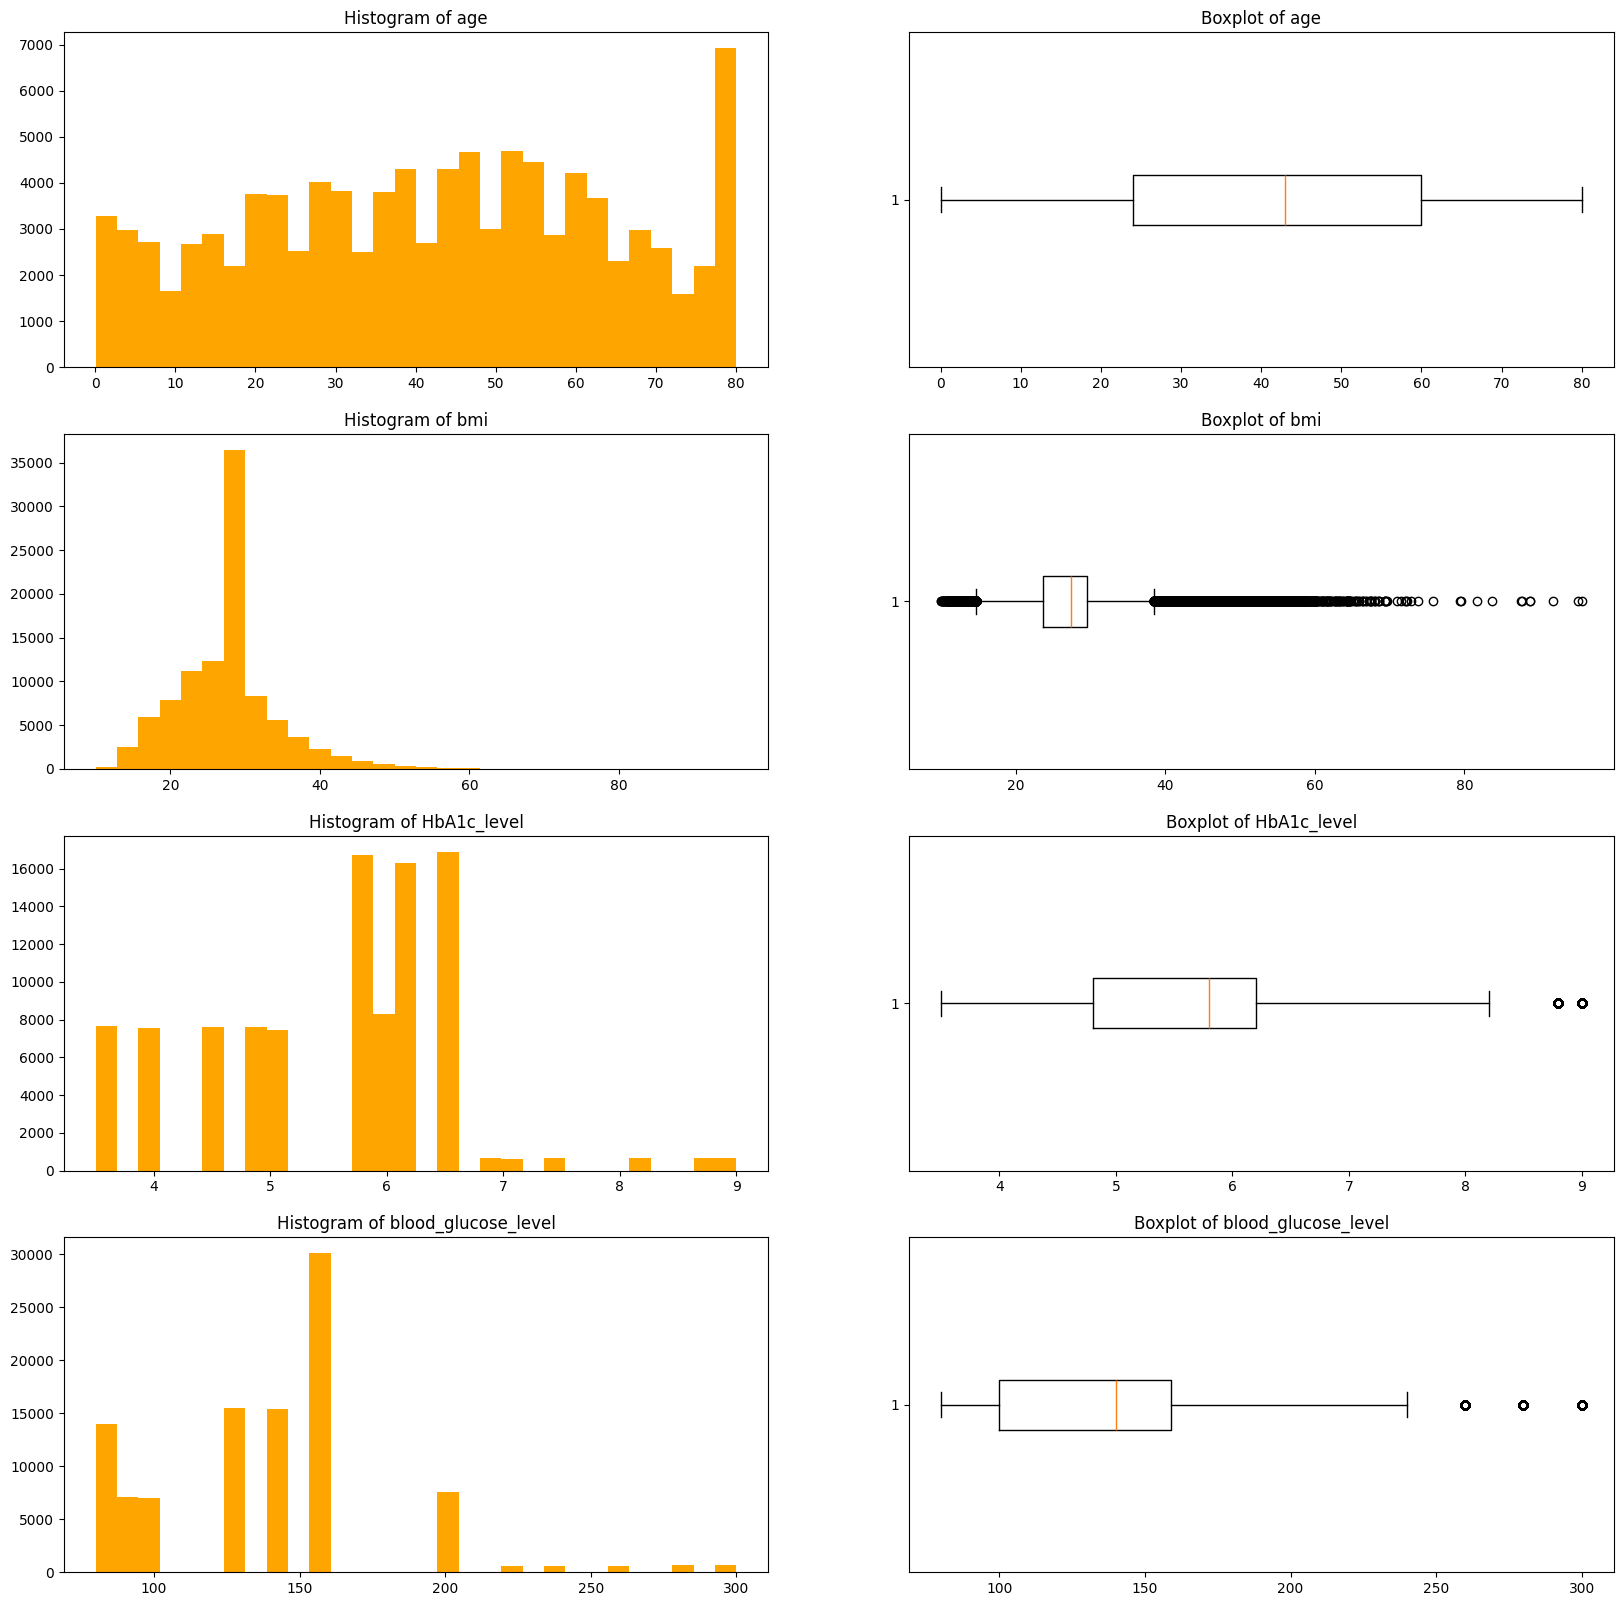

In [7]:
plt.figure(figsize = (20,20))
for feature in list(enumerate(['age','bmi','HbA1c_level','blood_glucose_level'])):
  plt.subplot(4,2, 2 * feature[0] + 1)
  plt.title('Histogram of ' + feature[1])
  plt.hist(x = df[feature[1]], bins = 30, color = 'orange')
  plt.subplot(4,2, 2 * feature[0] + 2)
  plt.title('Boxplot of ' + feature[1])
  plt.boxplot(x = df[feature[1]], vert = False)

plt.show()

In [8]:
df = df[df['gender'] != 'Other']
df['age'] = list(map(lambda x: round(x),df['age']))
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80,0,0,No Info,27.32,6.2,90,0
99996,Female,2,0,0,No Info,17.37,6.5,100,0
99997,Male,66,0,0,former,27.83,5.7,155,0
99998,Female,24,0,0,never,35.42,4.0,100,0


In [12]:
def IQR(df,col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[col] = df[col].clip(lower = lower_bound, upper = upper_bound)
  return df[col]

df['HbA1c_level'] = IQR(df,'HbA1c_level')
df['blood_glucose_level'] = IQR(df,'blood_glucose_level')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140.0,0
1,Female,54,0,0,No Info,27.32,6.6,80.0,0
2,Male,28,0,0,never,27.32,5.7,158.0,0
3,Female,36,0,0,current,23.45,5.0,155.0,0
4,Male,76,1,1,current,20.14,4.8,155.0,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80,0,0,No Info,27.32,6.2,90.0,0
99996,Female,2,0,0,No Info,17.37,6.5,100.0,0
99997,Male,66,0,0,former,27.83,5.7,155.0,0
99998,Female,24,0,0,never,35.42,4.0,100.0,0


In [13]:
df[['age','bmi','HbA1c_level','blood_glucose_level']].corr()

,age,bmi,HbA1c_level,blood_glucose_level
age,1.000000,0.337386,0.097096,0.102487
bmi,0.337386,1.000000,0.079892,0.083609
HbA1c_level,0.097096,0.079892,1.000000,0.147586
blood_glucose_level,0.102487,0.083609,0.147586,1.000000


In [23]:
df.drop(columns = ['gender','diabetes','hypertension','heart_disease']).groupby('smoking_history').agg(['min','max','mean','std'])

age                              bmi                    \
                min max       mean        std    min    max       mean   
smoking_history                                                          
No Info           0  80  33.538704  24.956810  10.01  95.69  25.343261   
current           0  80  44.063537  15.600763  11.91  75.78  28.432968   
ever              3  80  49.142143  16.911595  10.19  71.55  28.762121   
former            7  80  57.061698  16.528686  10.77  83.74  29.620746   
never             0  80  43.891200  20.259339  10.08  91.82  28.104150   
not current       0  80  47.719366  20.722369  12.50  67.39  28.208473   

                          HbA1c_level                           \
                      std         min  max      mean       std   
smoking_history                                                  
No Info          6.387905         3.5  8.3  5.457995  1.009905   
current          6.224653         3.5  8.3  5.537519  1.064572   
ever             6.345495         3.5  8.3  5.567499  1.067799   
former           6.378794         3.5  8.3  5.637190  1.106650   
never            6.658417         3.5  8.3  5.534316  1.054776   
not current      6.227788         3.5  8.3  5.556298  1.068746   

                blood_glucose_level                                
                                min    max        mean        std  
smoking_history                                                    
No Info                        80.0  247.5  134.898576  36.571578  
current                        80.0  247.5  138.727170  39.442525  
ever                           80.0  247.5  138.463652  39.417626  
former                         80.0  247.5  141.893338  41.555701  
never                          80.0  247.5  138.030961  38.852299  
not current                    80.0  247.5  138.577962  39.653074

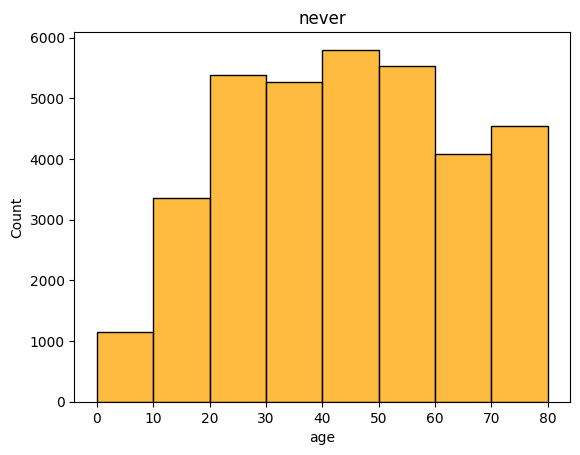

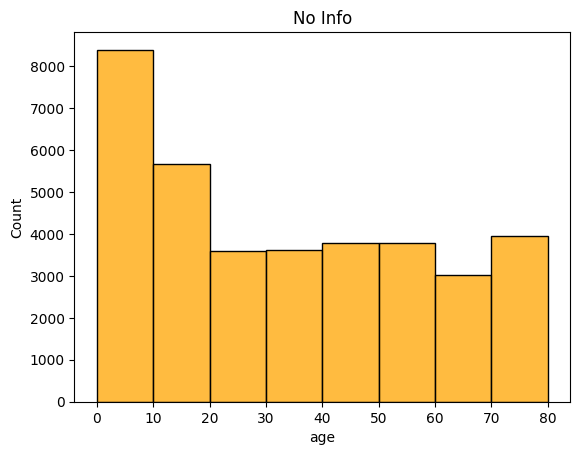

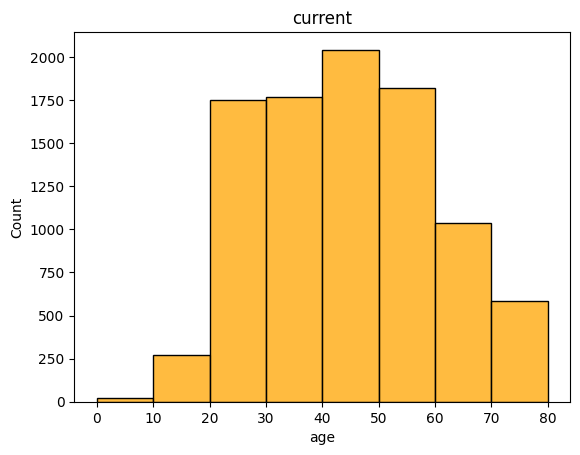

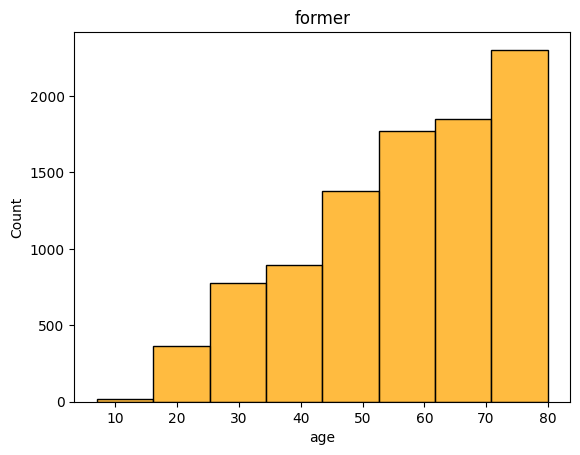

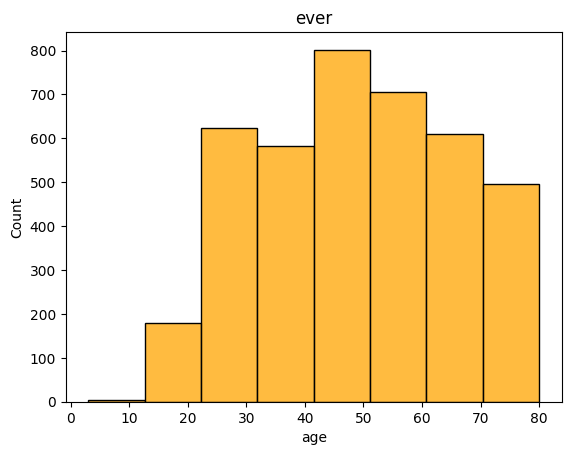

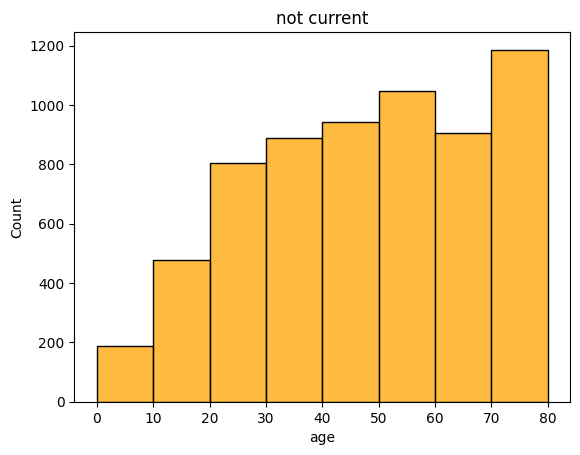

In [46]:
def smoker(value):
  df1 = df[df['smoking_history'] == value]
  #print(df1['diabetes'].value_counts())
  '''print(df1['gender'].value_counts())
  print(df1['hypertension'].value_counts())
  print(df1['heart_disease'].value_counts())'''
  plt.title(value)
  sns.histplot(data = df1, x = 'age', bins = 8, color = 'orange')
  #plt.show()
  #plt.boxplot(x = df1['age'], vert = False)
  plt.show()
for i in df['smoking_history'].unique():
  smoker(i)


In [50]:
!git pull origin main

fatal: couldn't find remote ref main
